# Data Visualization 

Learning Data Visualization in Finance Historical Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],'Increase','Decrease')
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()

In [4]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,Increase,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,Increase,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,Decrease,1,0,0.012107
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,Decrease,0,0,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,Decrease,0,1,-0.021531


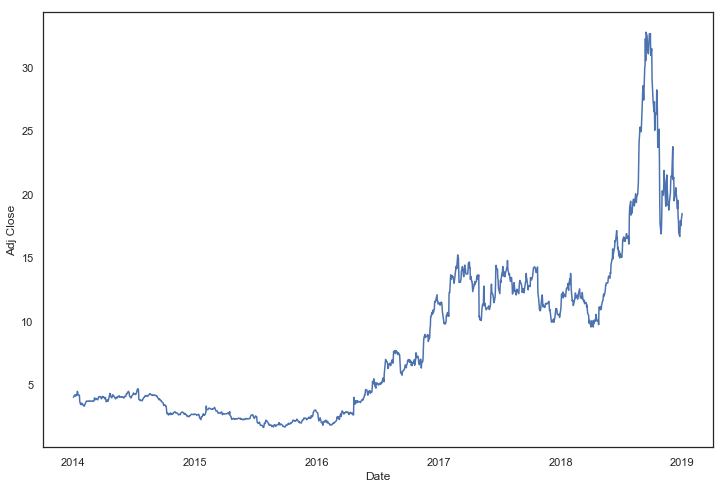

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.lineplot(dataset.index ,dataset['Adj Close'])

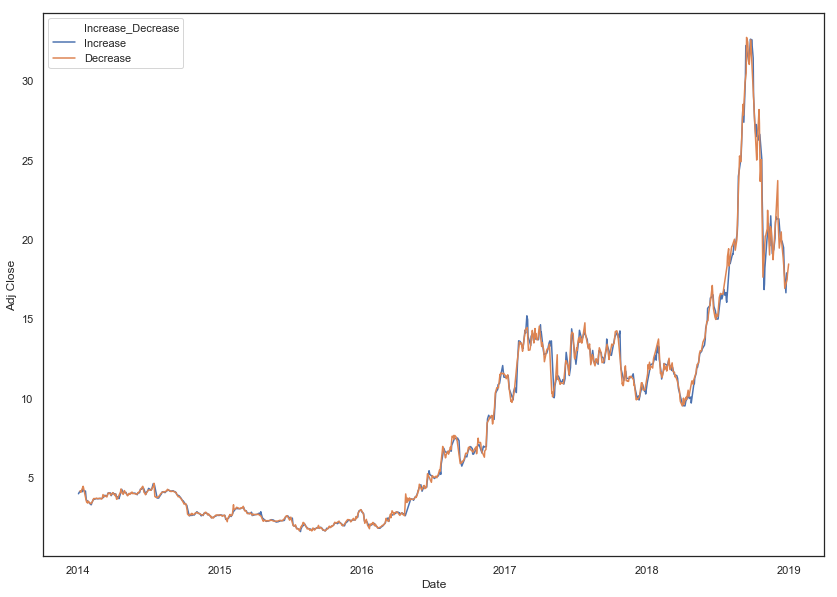

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax = sns.lineplot(x=dataset.index, y="Adj Close", hue="Increase_Decrease", data=dataset)

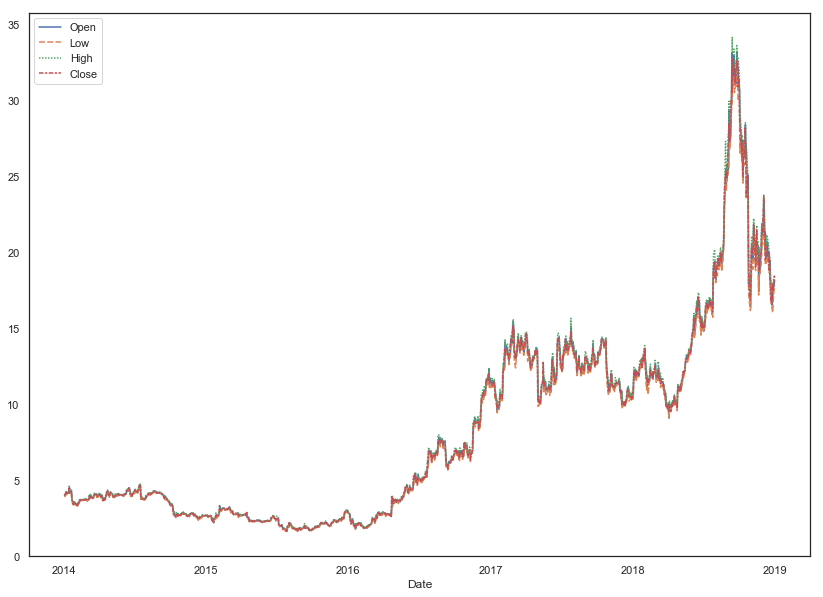

In [7]:
# Plot Multi lines
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax = sns.lineplot(data=dataset[['Open', 'Low', 'High', 'Close']])

In [8]:
dataset['Increase_Decrease'].value_counts()

Decrease    685
Increase    572
Name: Increase_Decrease, dtype: int64

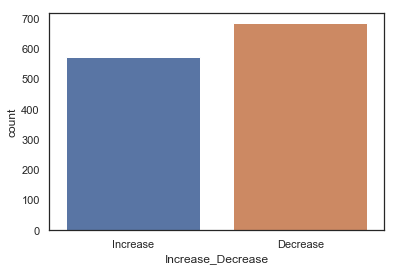

In [9]:
ax = sns.countplot(dataset['Increase_Decrease'],label="Count")   

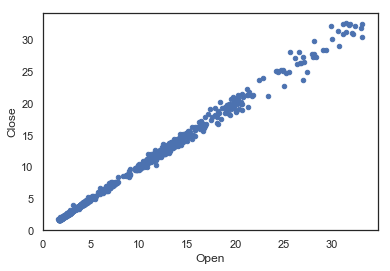

In [10]:
# Scatterplot
dataset.plot(kind="scatter", x="Open", y="Close")

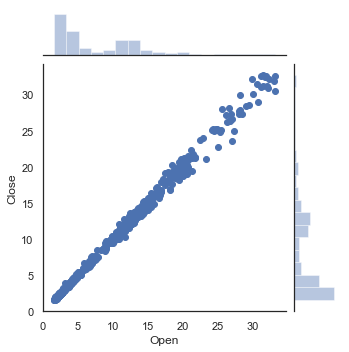

In [11]:
# bivariate scatterplots and univariate histograms
sns.jointplot(x="Open", y="Close", data=dataset, size=5)

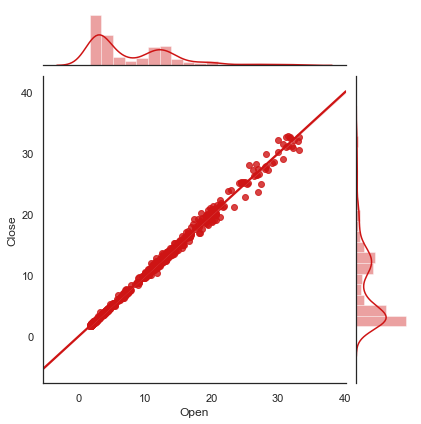

In [12]:
sns.jointplot(dataset.loc[:,'Open'], dataset.loc[:,'Close'], kind="regg", color="#ce1414")

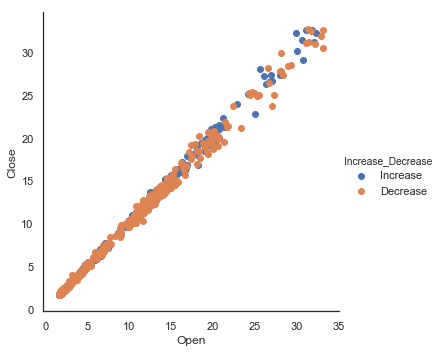

In [13]:
sns.FacetGrid(dataset, hue="Increase_Decrease", size=5) \
   .map(plt.scatter, "Open", "Close") \
   .add_legend()

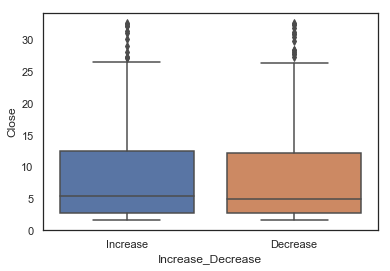

In [14]:
# Boxplot
sns.boxplot(x='Increase_Decrease', y=dataset['Close'], data=dataset)

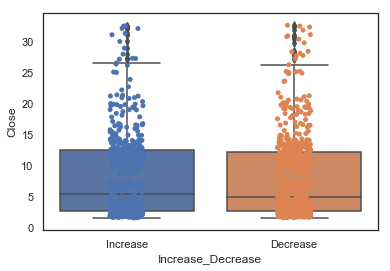

In [15]:
ax = sns.boxplot(x='Increase_Decrease', y=dataset['Close'], data=dataset)
ax = sns.stripplot(x='Increase_Decrease', y=dataset['Close'], data=dataset, jitter=True, edgecolor="gray")

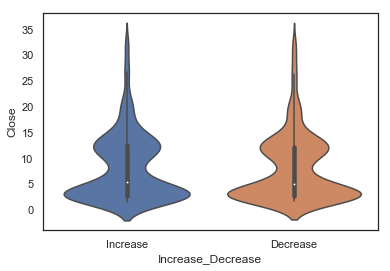

In [16]:
sns.violinplot(x='Increase_Decrease', y=dataset['Close'], data=dataset, size=6)

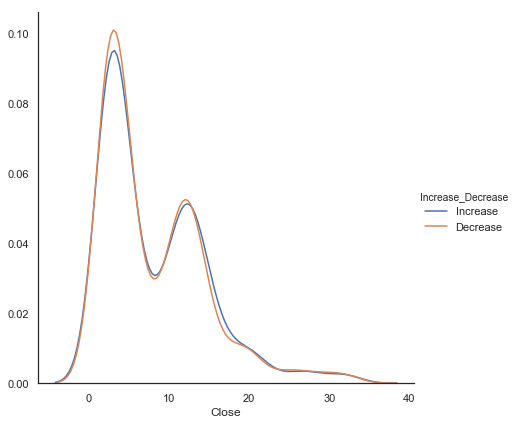

In [17]:
sns.FacetGrid(dataset, hue="Increase_Decrease", size=6) \
   .map(sns.kdeplot, "Close") \
   .add_legend()

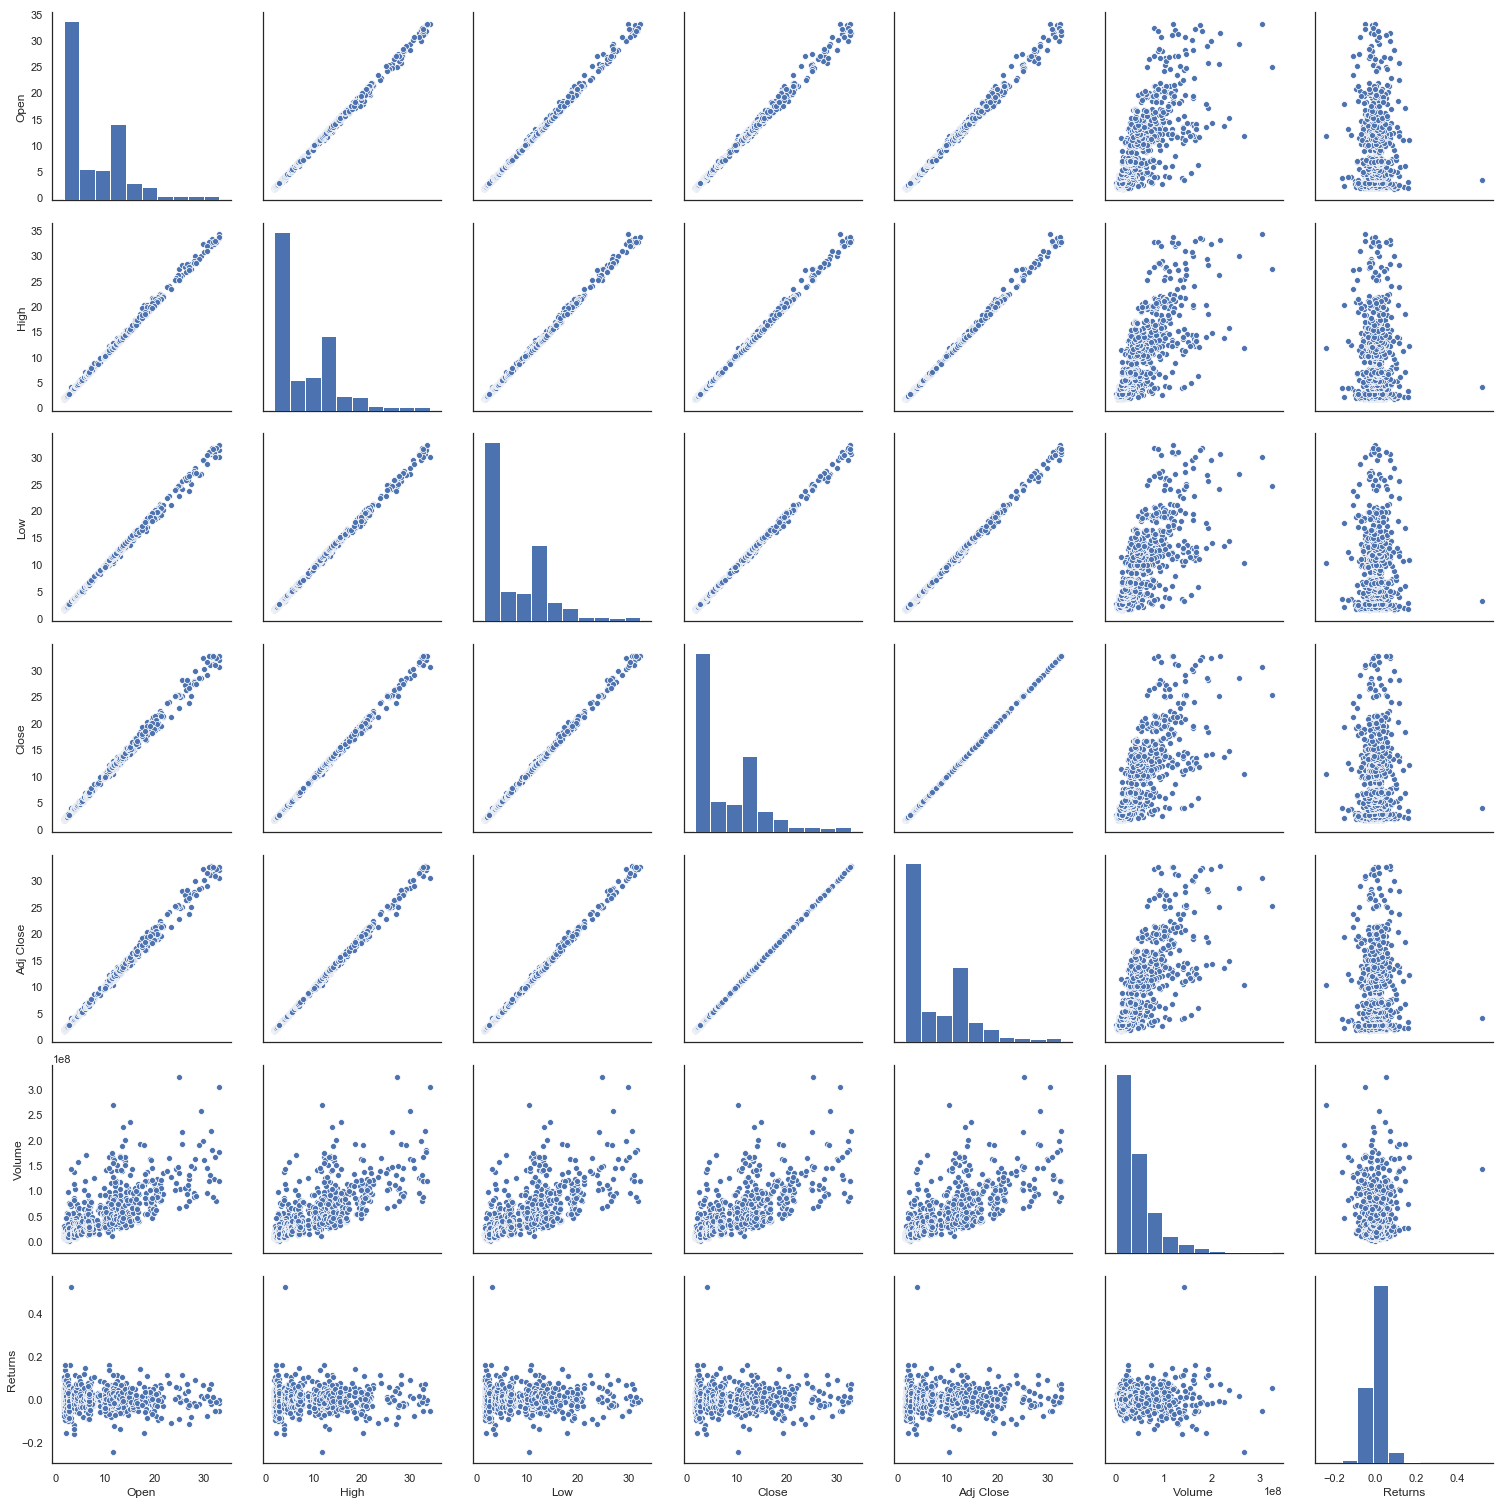

In [18]:
sns.pairplot(dataset.drop(["Increase_Decrease", "Buy_Sell_on_Open", "Buy_Sell"], axis=1), size=3)

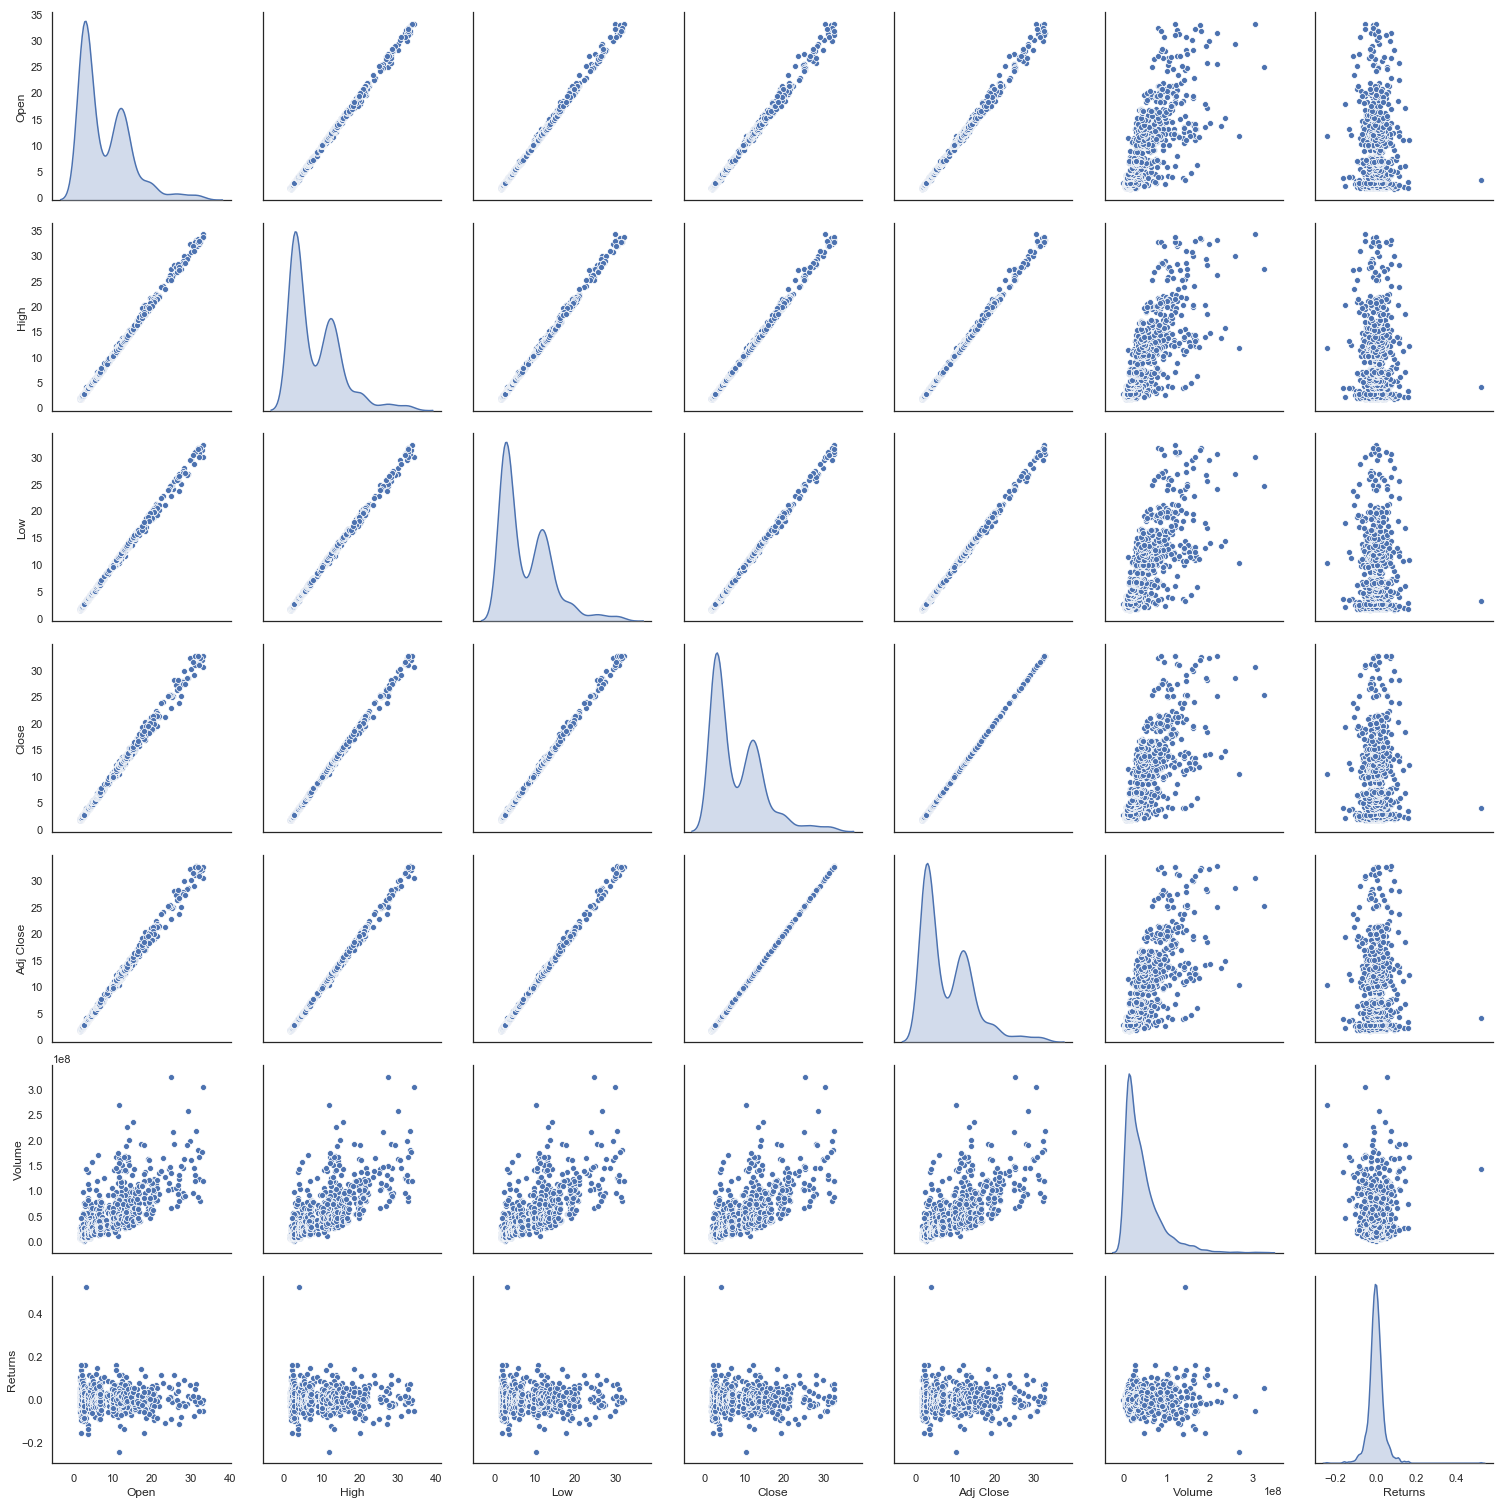

In [19]:
sns.pairplot(dataset.drop(["Increase_Decrease", "Buy_Sell_on_Open", "Buy_Sell"], axis=1), size=3, diag_kind="kde")

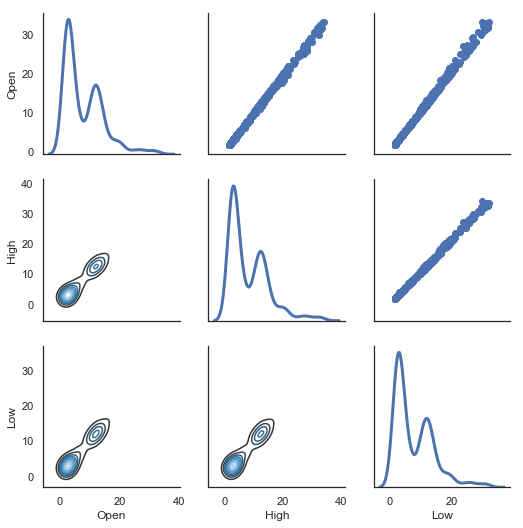

In [20]:
sns.set(style="white")
df = dataset.loc[:,['Open','High','Low']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029004916BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000029004AFB908>]], dtype=object)

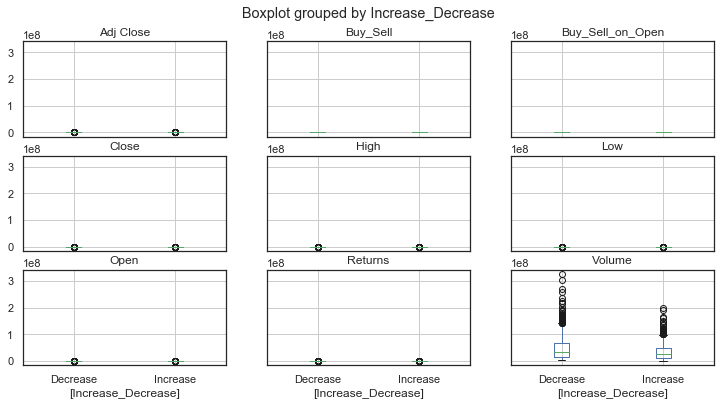

In [21]:
dataset.boxplot(by="Increase_Decrease", figsize=(12, 6))

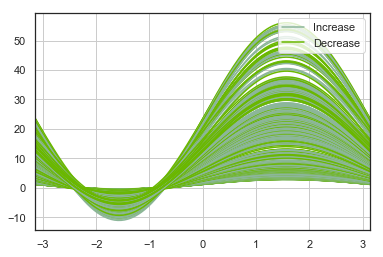

In [22]:
from pandas.tools.plotting import andrews_curves

andrews_curves(dataset[['Open', 'Close', 'Increase_Decrease']], "Increase_Decrease")

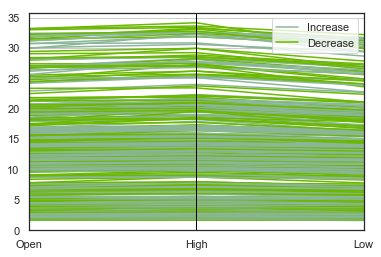

In [23]:
from pandas.tools.plotting import parallel_coordinates

parallel_coordinates(dataset[['Open', 'High', 'Low', 'Increase_Decrease']], "Increase_Decrease")

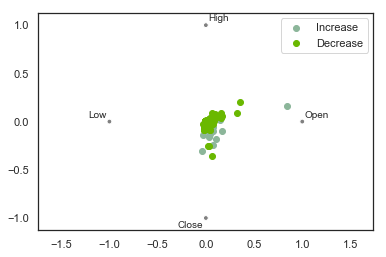

In [24]:
from pandas.tools.plotting import radviz

radviz(dataset[['Open','High', 'Low', 'Close','Increase_Decrease']], "Increase_Decrease")

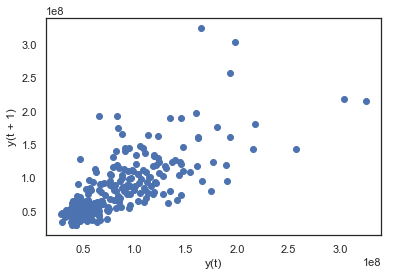

In [25]:
from pandas.plotting import lag_plot

lag_plot(dataset['Volume'].tail(250))

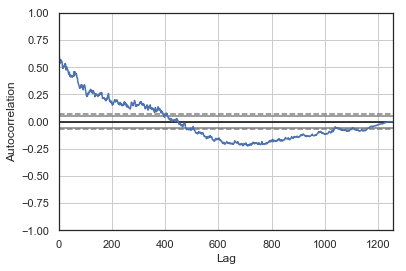

In [26]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dataset['Volume'])

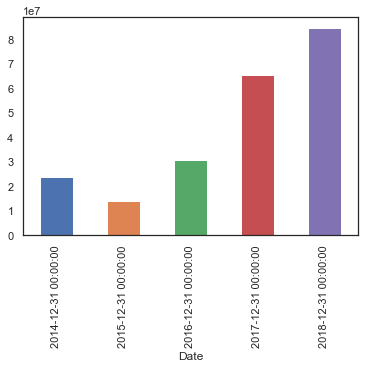

In [27]:
dataset['Volume'].resample('Y').mean().plot.bar()

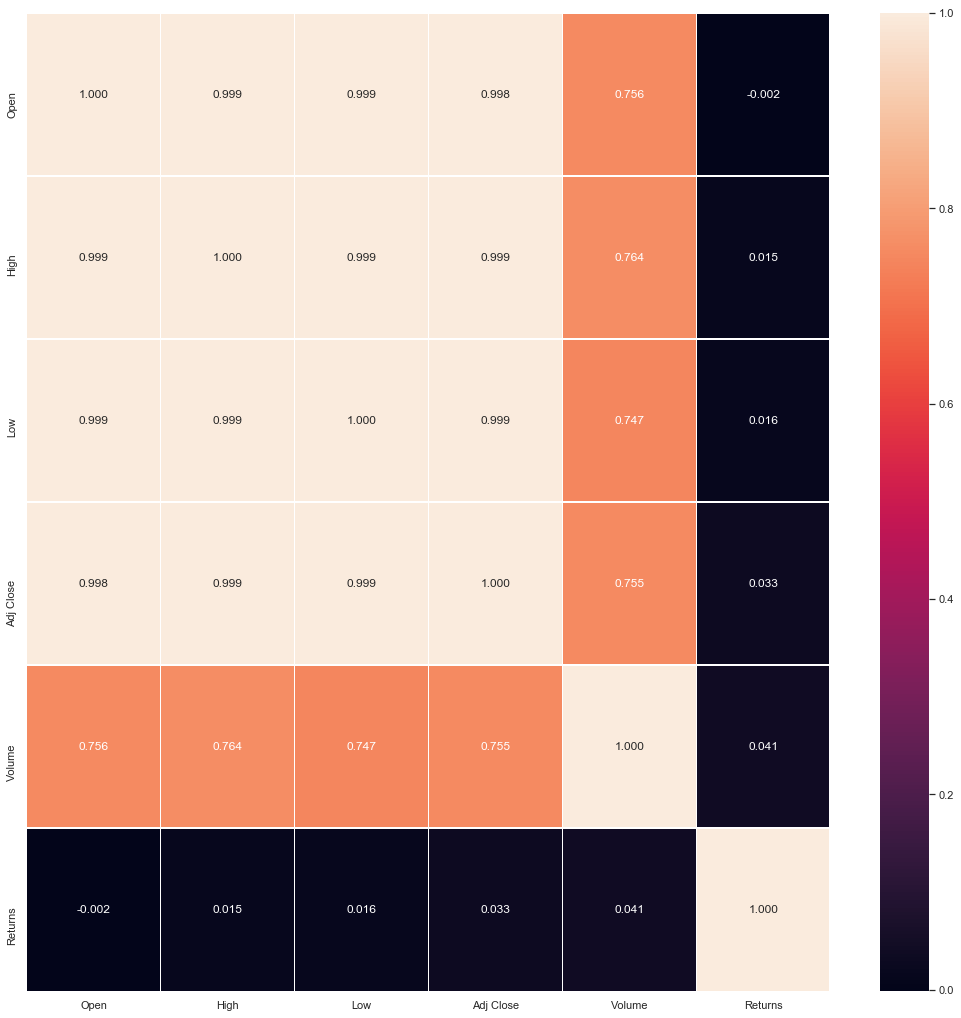

In [28]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dataset[['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Returns']].corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)

In [29]:
import plotly.plotly as py
import plotly.figure_factory as ff

table = ff.create_table(dataset.describe())
py.iplot(table, filename='simple_table')

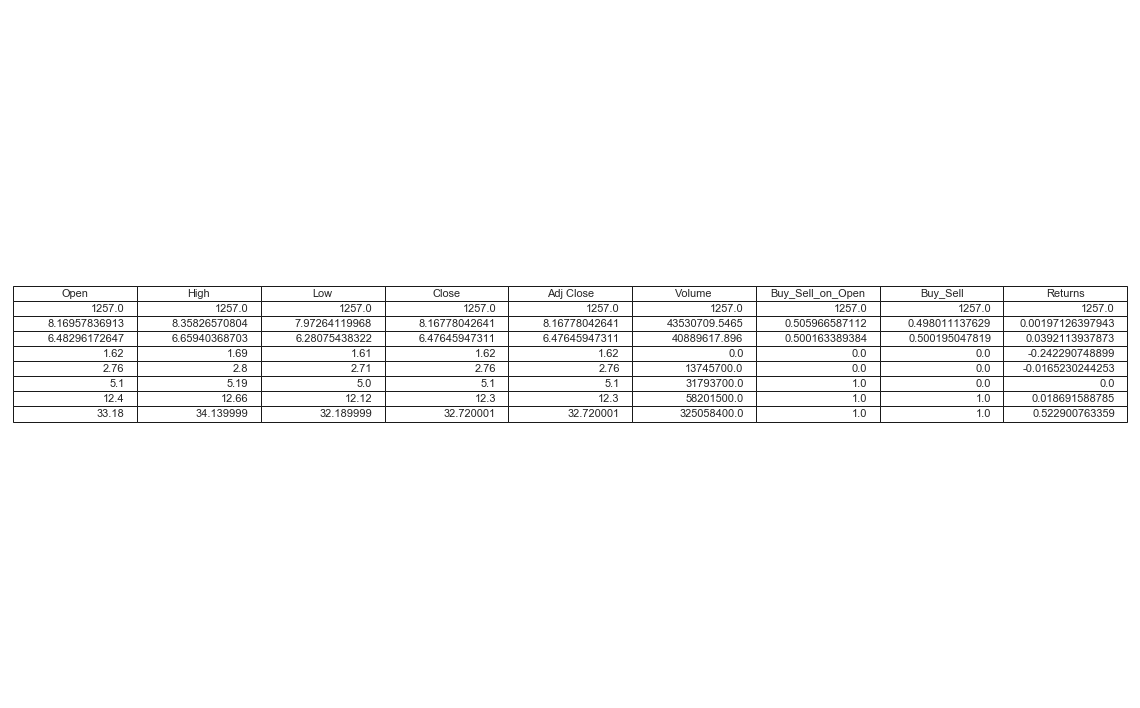

In [41]:
fig, ax = plt.subplots(figsize=(16,10))

ax.axis('off')
ax.table(cellText=dataset.describe().values, colLabels=dataset.describe().columns, loc='center')
fig.tight_layout()
plt.show()